In [2]:
# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset from scikit-learn
from sklearn.datasets import load_breast_cancer


In [3]:
# Load dataset
data = load_breast_cancer()

# Convert it to a Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target column (0 = Malignant, 1 = Benign)
df['target'] = data.target

# Display first few rows
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 569 rows and 31 columns.


In [5]:
print(df.isnull().sum())  # Check for missing values


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


C:\Users\dell\AppData\Local\Temp\ipykernel_14212\2757817856.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['target'], palette="viridis")


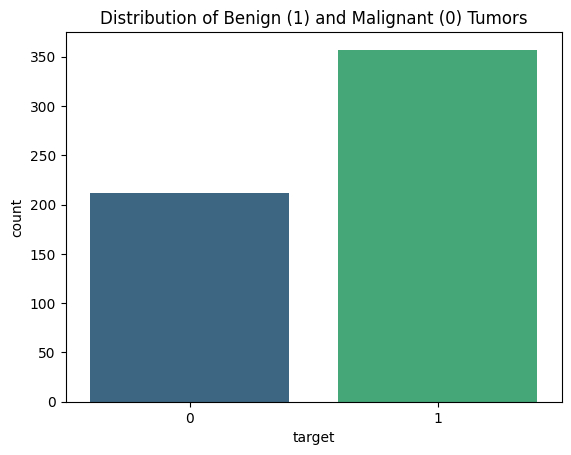

target
1    357
0    212
Name: count, dtype: int64


In [6]:
sns.countplot(x=df['target'], palette="viridis")
plt.title("Distribution of Benign (1) and Malignant (0) Tumors")
plt.show()

print(df['target'].value_counts())  # 0 = Malignant, 1 = Benign


In [7]:
# Define features (X) and target (y)
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target labels

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


Training data: (455, 30), Testing data: (114, 30)


In [10]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform on training data
X_train = scaler.fit_transform(X_train)

# Transform test data (using same scaler)
X_test = scaler.transform(X_test)


In [11]:
# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# Predict on test data
y_pred = model.predict(X_test)


In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.96


In [14]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



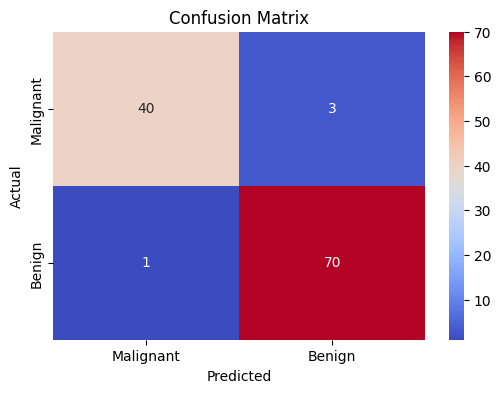

In [16]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [17]:
# Example input (using first row from test set)
new_data = X_test[0].reshape(1, -1)

# Predict class
prediction = model.predict(new_data)

# Output result
print("Predicted Tumor Type:", "Benign" if prediction[0] == 1 else "Malignant")


Predicted Tumor Type: Benign


In [18]:
import joblib

# Save model
joblib.dump(model, "breast_cancer_model.pkl")

# Load model
loaded_model = joblib.load("breast_cancer_model.pkl")
